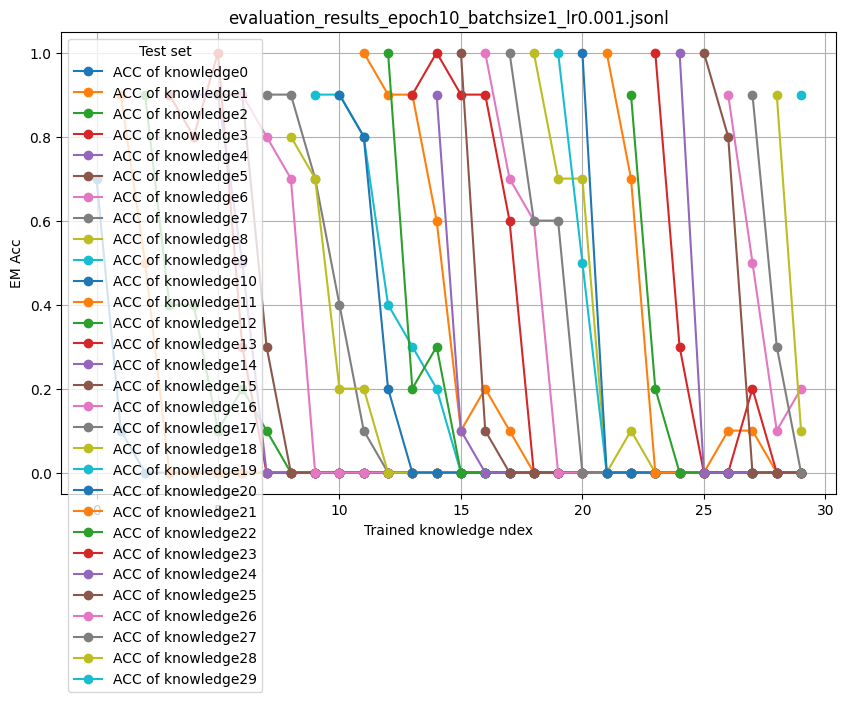

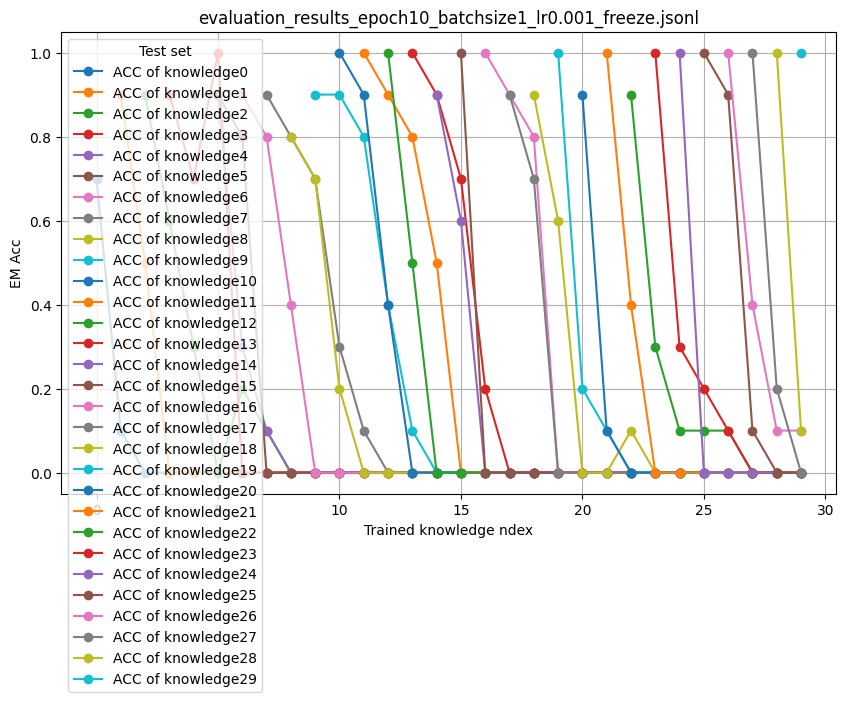

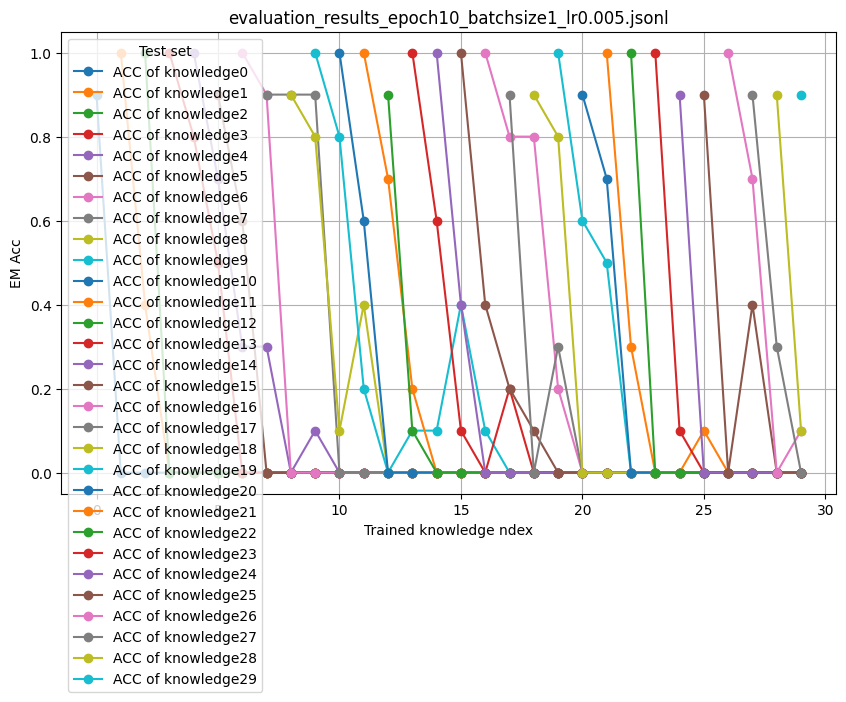

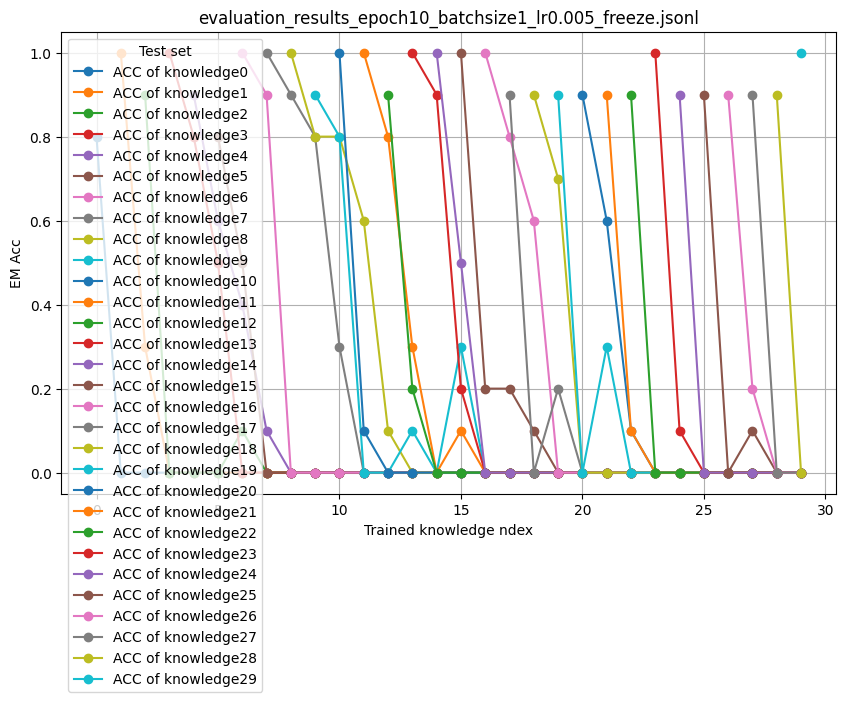

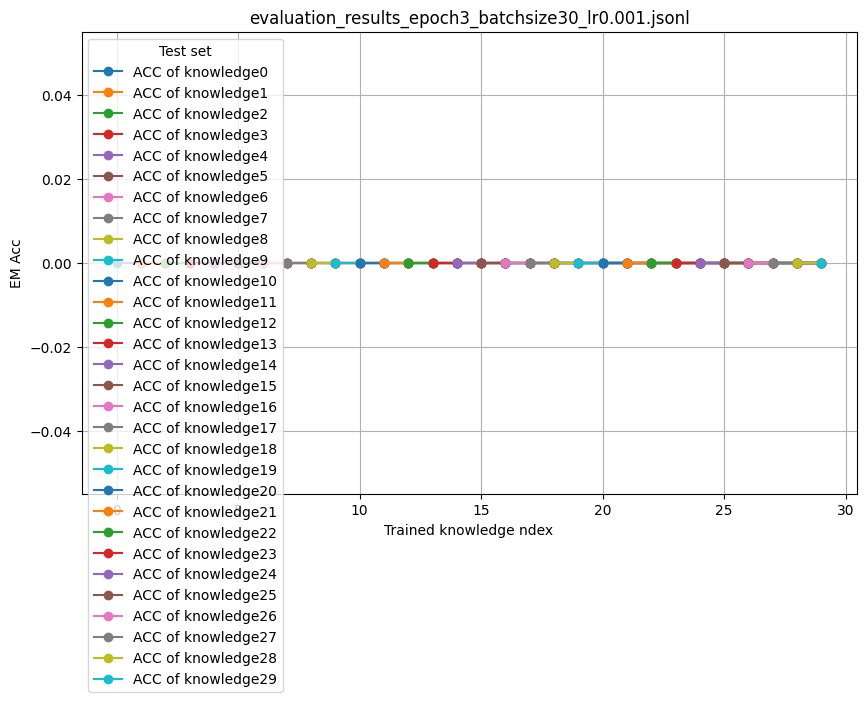

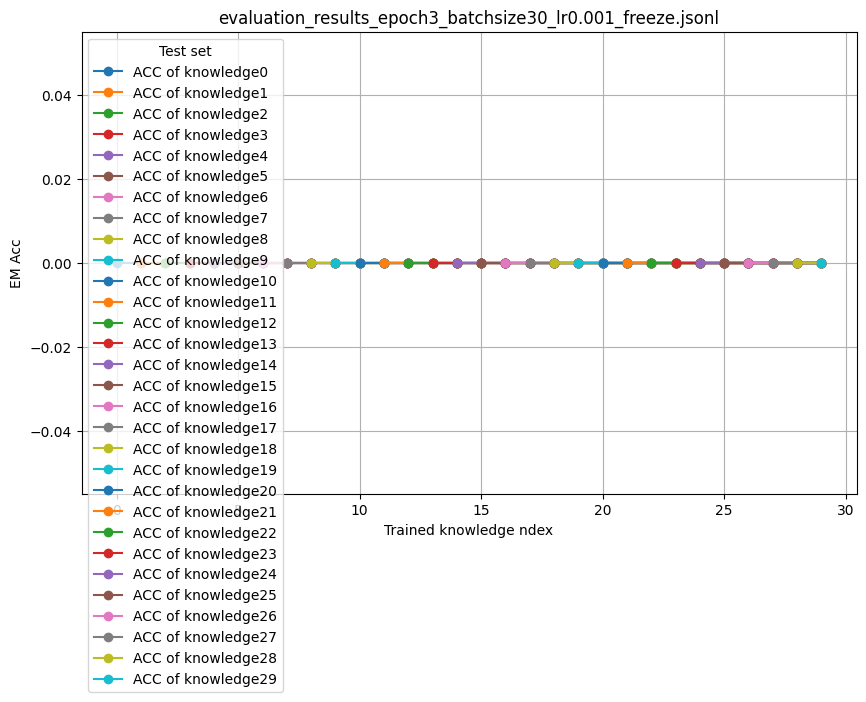

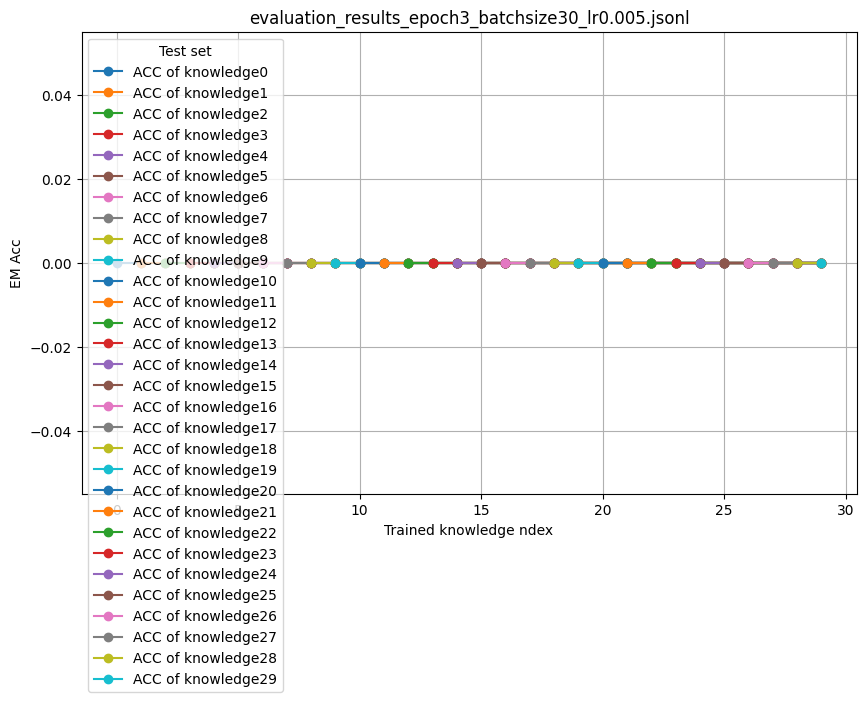

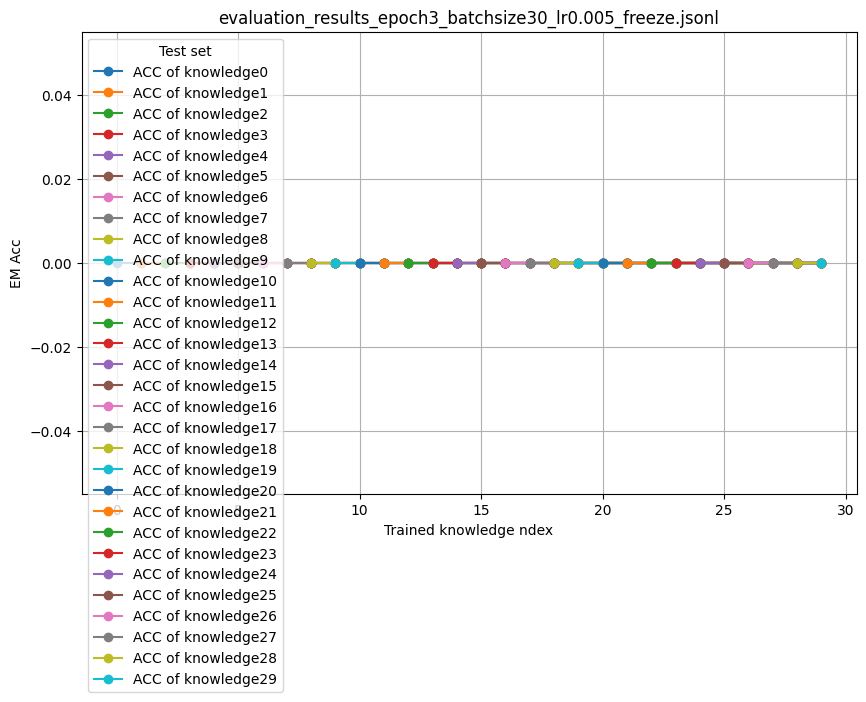

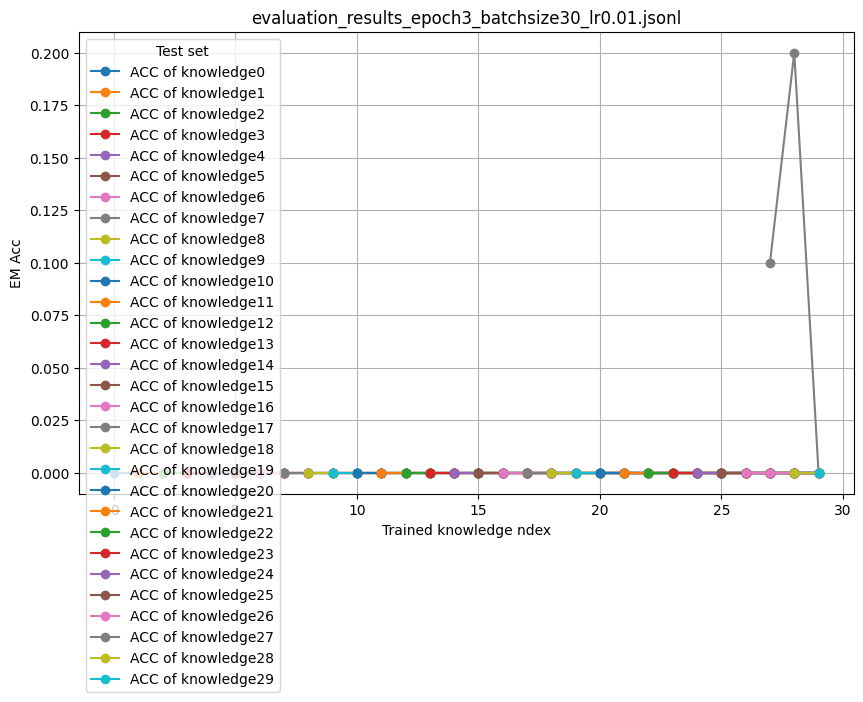

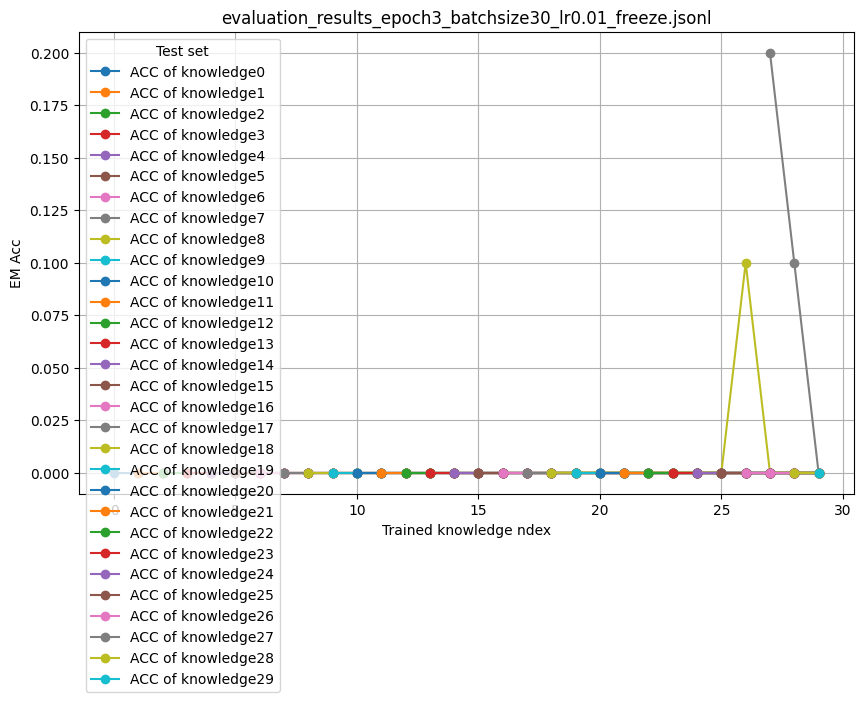

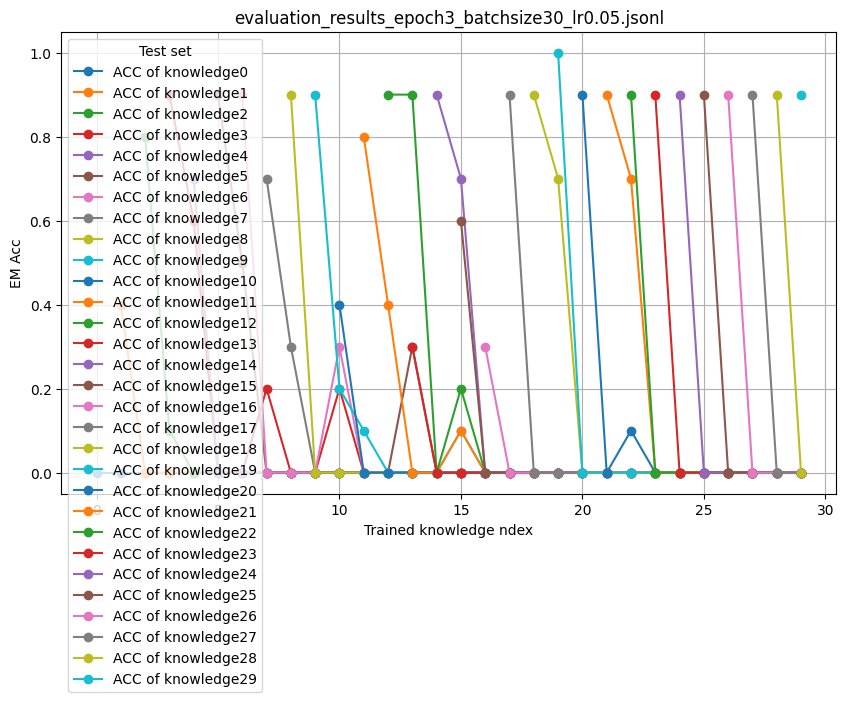

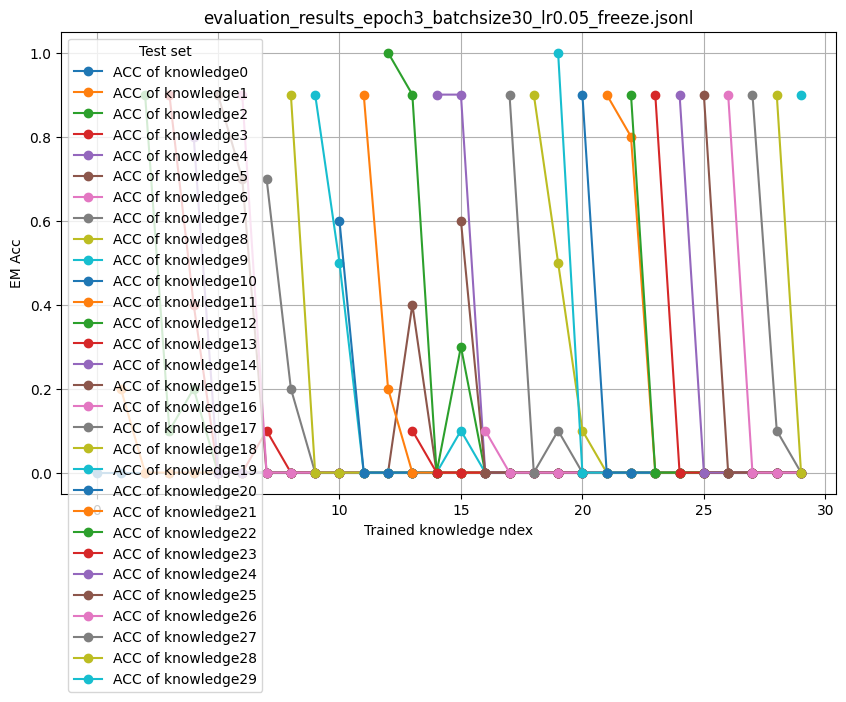

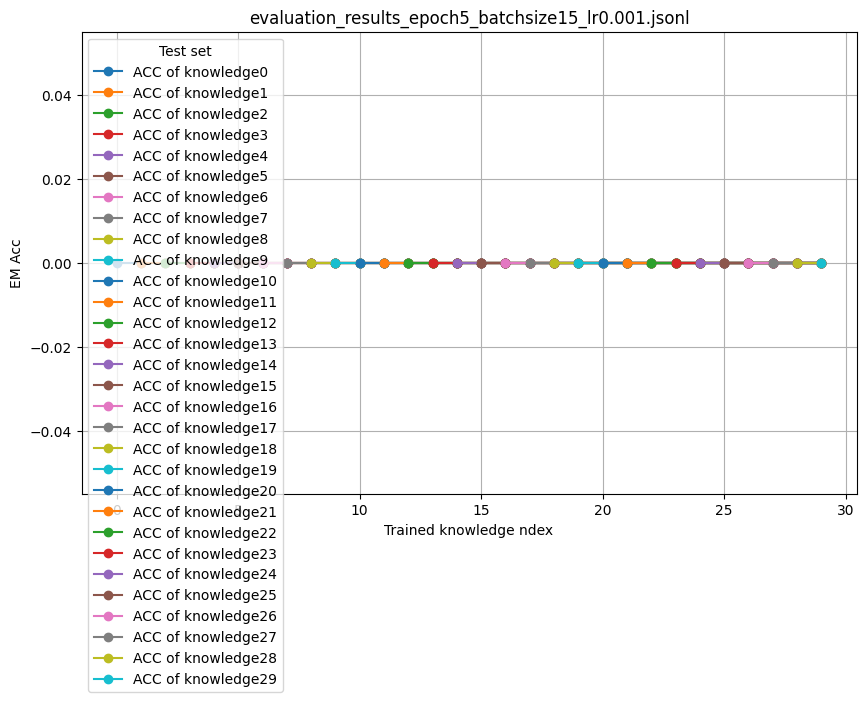

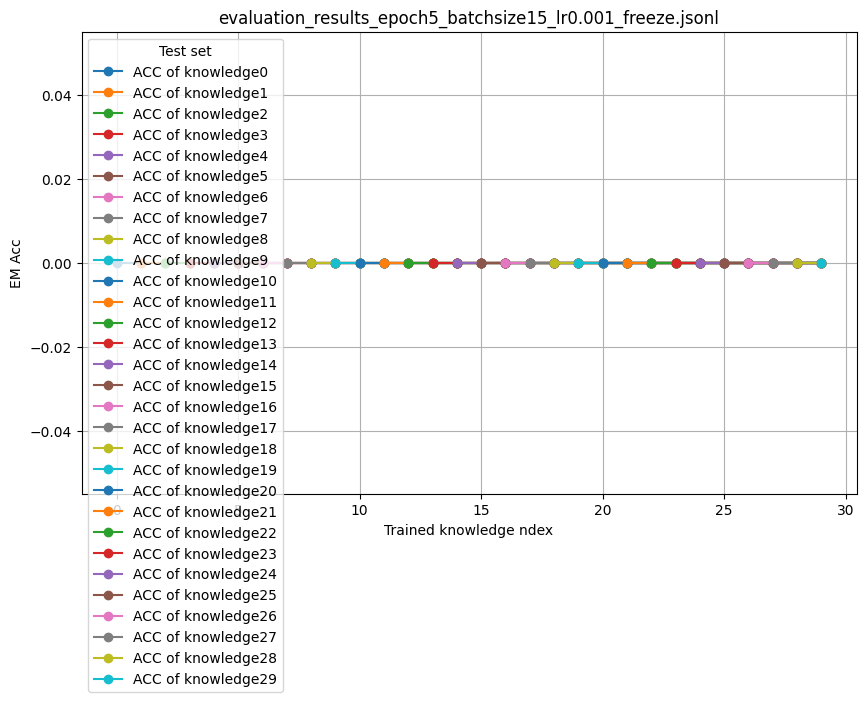

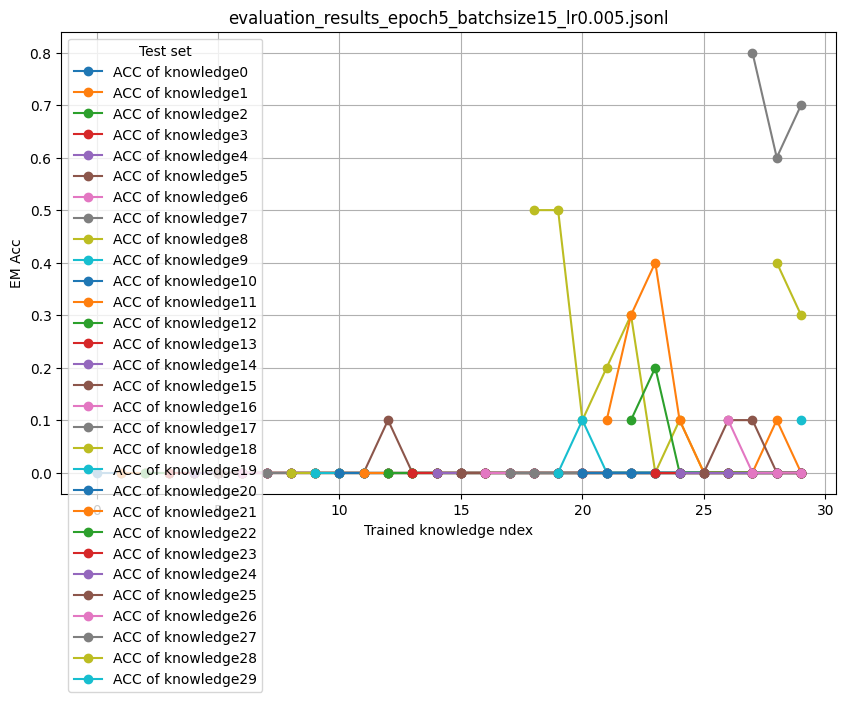

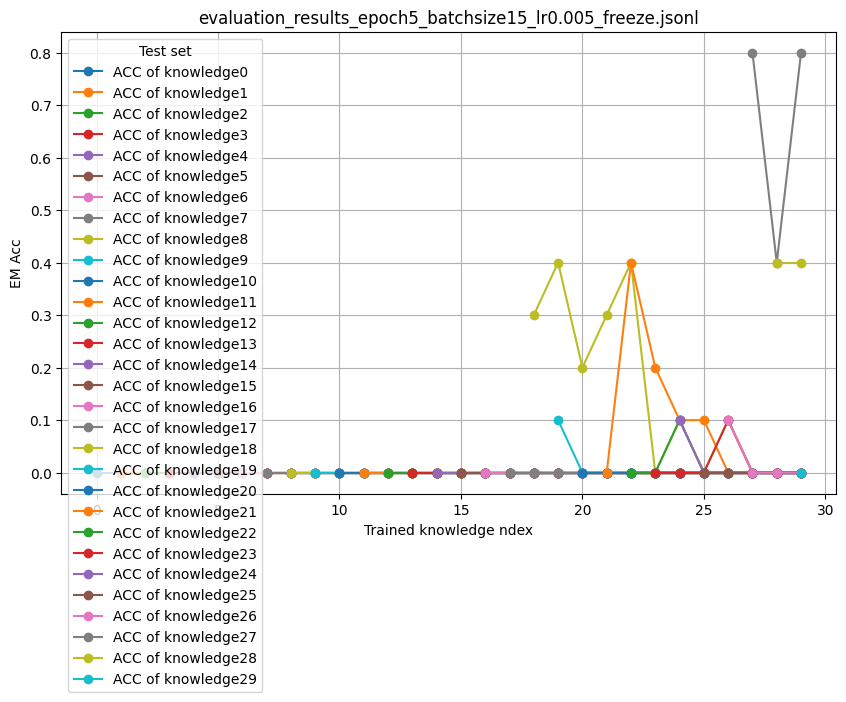

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Get all JSONL files in the current directory
jsonl_files = [file for file in os.listdir('.') if file.endswith('.jsonl')]
jsonl_files.sort()

# Plot graphs for each JSONL file
for jsonl_file in jsonl_files:
    # Load the JSONL file into a pandas DataFrame
    df = pd.read_json(jsonl_file, lines=True)

    # Create a plot for each test_data_idx
    plt.figure(figsize=(10, 6))
    
    # Plot data for each test_data_idx
    for test_idx in df['test_data_idx'].unique():
        # Filter data for the current test_data_idx
        test_data = df[df['test_data_idx'] == test_idx]
        
        # Plot the line for the current test_data_idx
        plt.plot(test_data['train_data_idx'], test_data['accuracy'], label=f'ACC of knowledge{test_idx}', marker='o')
    
    # Customize the plot
    plt.title(f'{jsonl_file}')
    plt.xlabel('Trained knowledge ndex')
    plt.ylabel('EM Acc')
    plt.legend(title='Test set')
    plt.grid(True)



In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math

# Get all JSONL files in the current directory
jsonl_files = [file for file in os.listdir('.') if file.endswith('.jsonl')]
jsonl_files.sort()

# Calculate the number of rows and columns for subplots (e.g., 2 columns)
num_plots = len(jsonl_files)
cols = 2  # Number of columns in the plot grid
rows = math.ceil(num_plots / cols)  # Calculate rows based on the number of plots

# Create a figure with subplots (rows x cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, 6 * rows))

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Loop over all JSONL files and plot data in each subplot
for idx, jsonl_file in enumerate(jsonl_files):
    # Load the JSONL file into a pandas DataFrame
    df = pd.read_json(jsonl_file, lines=True)

    # Get the current axis for the plot
    ax = axes[idx]

    # Plot data for each test_data_idx
    for test_idx in df['test_data_idx'].unique():
        # Filter data for the current test_data_idx
        test_data = df[df['test_data_idx'] == test_idx]
        
        # Plot the line for the current test_data_idx
        ax.plot(test_data['train_data_idx'], test_data['accuracy'], label=f'Test {test_idx}', marker='o')

    # Customize each subplot
    ax.set_title(f'{jsonl_file}')
    ax.set_xlabel('Trained knowledge index')
    ax.set_ylabel('EM Accuracy')
    ax.grid(True)
    ax.legend(title='Test Sets')

# Remove any empty subplots if the number of JSONL files isn't a perfect multiple of cols
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.tight_layout()

# Save the combined figure as a single image file
plt.savefig('combined_plots.png')

# Close the plot to avoid memory overload
plt.close()
